In [23]:
# 📌 STEP 0: IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [41]:
# 📌 STEP 1: LOAD DATASET
df = pd.read_excel("heart_disease.xlsx", sheet_name=1)
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [42]:
# 📌 STEP 2: CHECK BASIC INFO
df.shape
df.info()
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [43]:
# remove spaces & make column names lowercase
df.columns = df.columns.str.strip().str.lower()

df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [44]:
# 📌 STEP 3: DATA CLEANING
df_clean = df.copy()

for col in df_clean.columns:
    df_clean[col] = df_clean[col].astype(str).str.strip()
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')


In [45]:
#📌 STEP 4: HANDLE MISSING VALUES
df_clean.isnull().sum()
df_clean.fillna(df_clean.median(), inplace=True)


In [46]:
# 📌 STEP 5: CONFIRM DATA TYPES
df_clean.dtypes


age           int64
sex         float64
cp          float64
trestbps      int64
chol          int64
fbs         float64
restecg     float64
thalch        int64
exang       float64
oldpeak     float64
slope       float64
thal        float64
num           int64
dtype: object

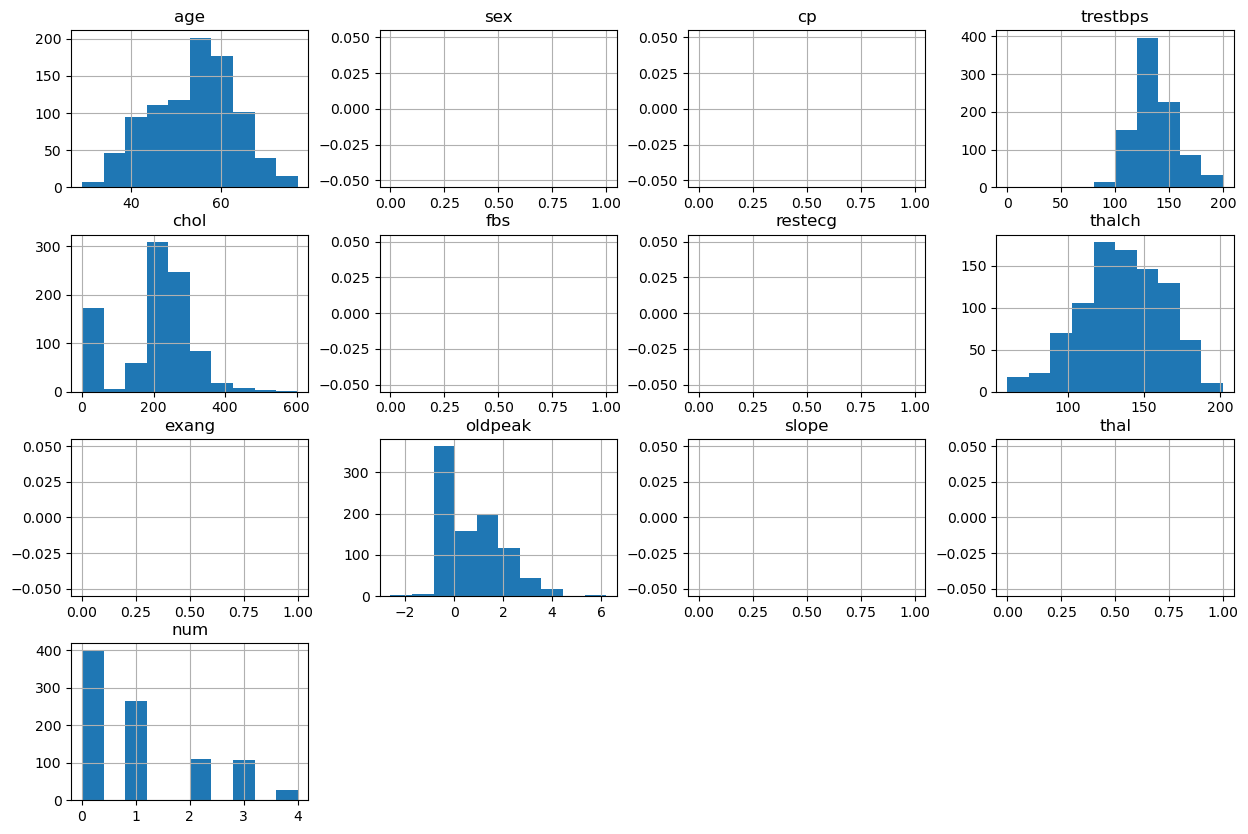

In [47]:
# 📌 STEP 6: EXPLORATORY DATA ANALYSIS (EDA)
# 🔹 Histograms
df_clean.hist(figsize=(15,10))
plt.show()


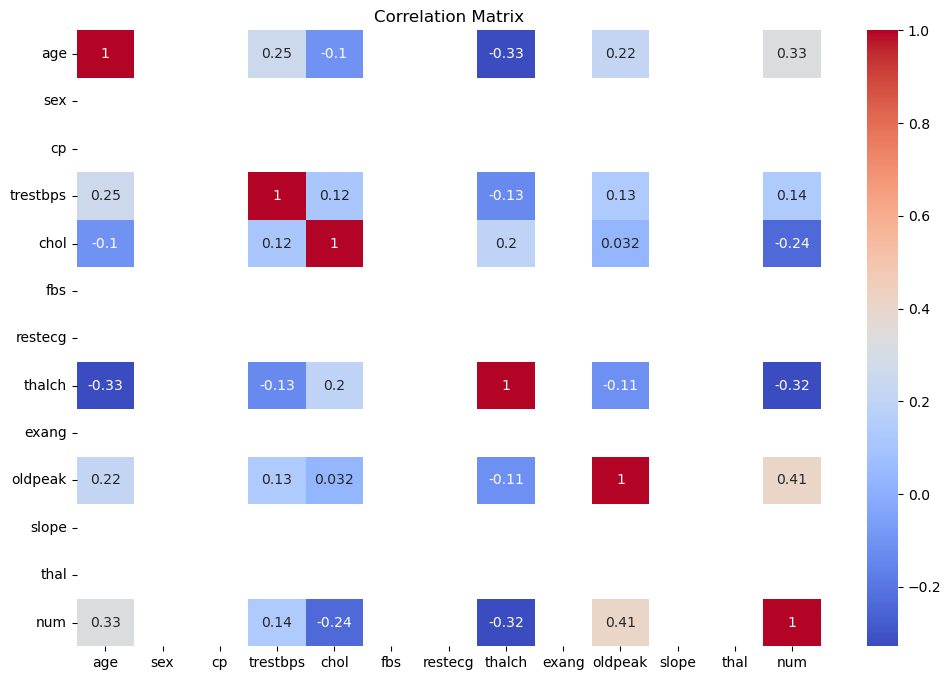

In [48]:
# 🔹 Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [49]:
# 📌 STEP 7: FEATURE & TARGET SPLIT
X = df_clean.drop(columns=['num'])
y = df_clean['num']



In [50]:
# STEP 8: CONVERT TARGET TO BINARY
y = (y > 0).astype(int)
y.value_counts()


num
1    509
0    399
Name: count, dtype: int64

In [51]:
# STEP 9: TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [52]:
# STEP 10: DECISION TREE MODEL
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [53]:
# STEP 11: PREDICTION & EVALUATION
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6593406593406593
              precision    recall  f1-score   support

           0       0.60      0.70      0.64        80
           1       0.73      0.63      0.67       102

    accuracy                           0.66       182
   macro avg       0.66      0.66      0.66       182
weighted avg       0.67      0.66      0.66       182



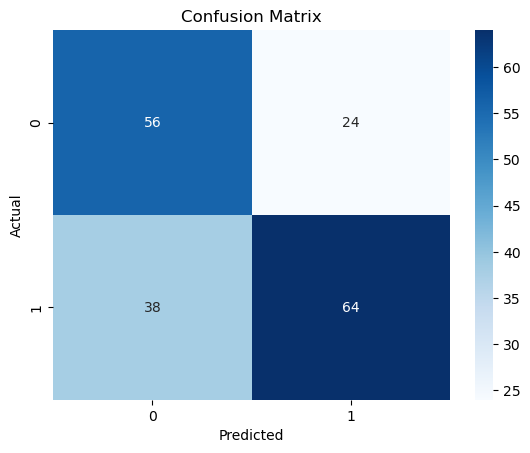

In [54]:
# STEP 12: CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [55]:
# STEP 13: HYPERPARAMETER TUNING
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)
grid.best_params_


{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [56]:
# STEP 14: FINAL OPTIMIZED MODEL
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)

y_pred_best = best_dt.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Optimized Accuracy: 0.7362637362637363
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        80
           1       0.78      0.74      0.76       102

    accuracy                           0.74       182
   macro avg       0.73      0.74      0.73       182
weighted avg       0.74      0.74      0.74       182



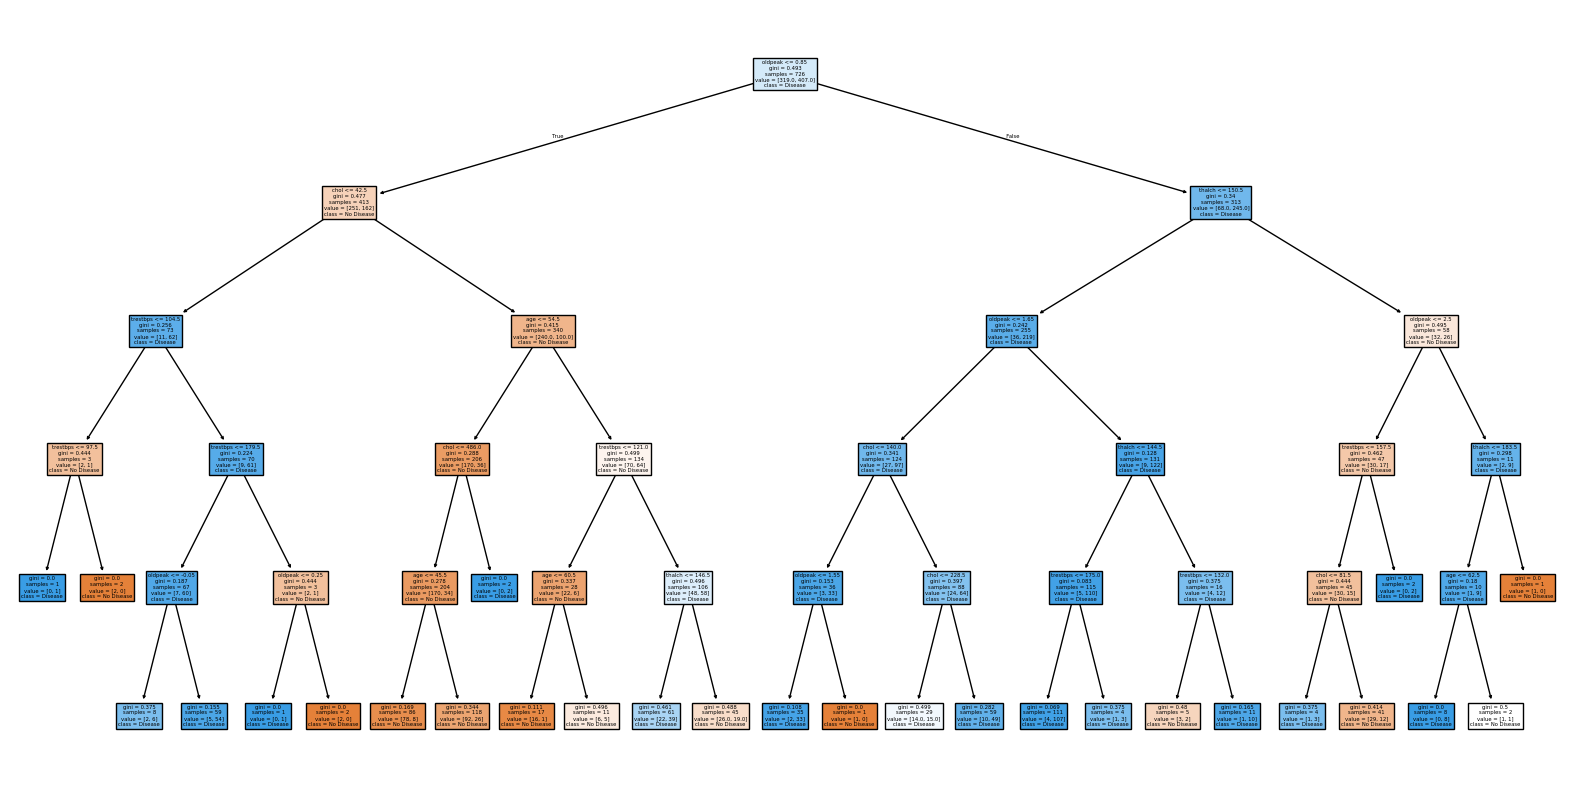

In [57]:
# STEP 15: DECISION TREE VISUALIZATION
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True
)
plt.show()


In [ ]:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Answer: Common hyperparameters of a Decision Tree include:

max_depth: Controls the maximum depth of the tree. Smaller depth prevents overfitting, while larger depth can capture complex patterns but may overfit.

min_samples_split: Minimum number of samples required to split a node. Higher values make the tree more general and reduce overfitting.

min_samples_leaf: Minimum samples required at a leaf node. Larger values smooth the model and improve generalization.

max_features: Number of features considered for splitting. Limiting features reduces variance.

criterion (gini / entropy): Determines how the quality of a split is measured. Gini is faster, entropy is more informative.

# 2. What is the difference between Label Encoding and One-Hot Encoding?
### Label Encoding
Label Encoding is a technique used to convert categorical data into numerical form by assigning a unique integer value to each category.
For example, if a feature has categories like Red, Blue, and Green, they can be encoded as Red = 0, Blue = 1, and Green = 2.
This method is simple and memory efficient but may introduce an ordinal relationship between categories, which may not always be meaningful.
Label Encoding is commonly used with tree-based models like Decision Trees and Random Forests.

### One-Hot Encoding
One-Hot Encoding is a technique where each category of a feature is converted into a separate binary column.
For example, a color feature with values Red, Blue, and Green will be represented as three columns where only one column has a value of 1 and the rest are 0.
This method does not create any ordinal relationship between categories, making it suitable for linear and distance-based algorithms.
However, One-Hot Encoding increases the dimensionality of the dataset.

